In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

2.3.0


In [5]:
#Single layer NN Model
model = tf.keras.Sequential([
   keras.layers.Dense(units=1, input_shape=[1], name='layer1')], name='single_neuron_model')
model.summary()

Model: "single_neuron_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Weight
w = model.layers[0].get_weights()[0][0]
print("Weight:",w)
#Bias
b = model.layers[0].get_weights()[1][0]
print("Bias:",b)

Weight: [-1.5205684]
Bias: 0.0


**LOSS function** measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the **OPTIMIZER function** to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with somehting like y=5x+5, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower)

It will repeat this for the number of **EPOCHS** which you will see shortly. But first, here's how we tell it to use 'MEAN SQUARED ERROR' for the loss and 'STOCHASTIC GRADIENT DESCENT' for the optimizer. 

In [12]:
#Compile
model.compile(optimizer='sgd', loss='mean_squared_error')

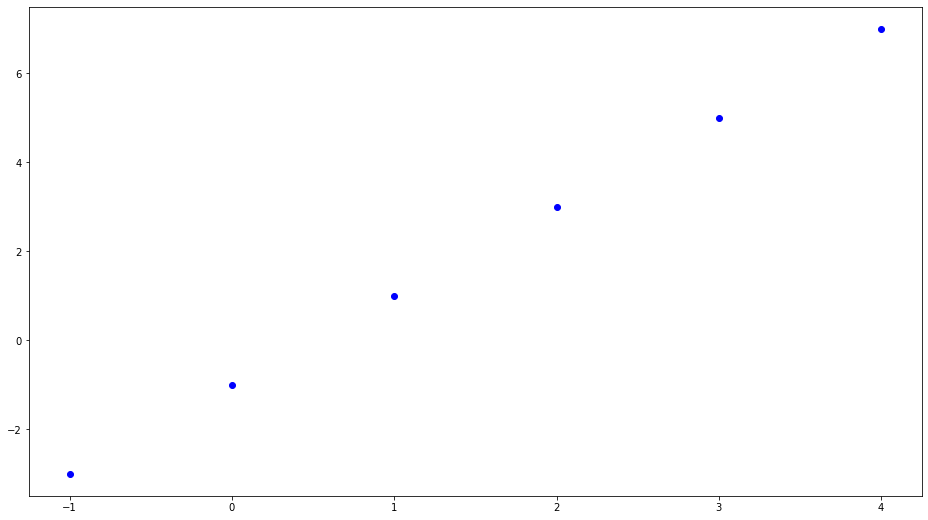

In [13]:
#Data and plot
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(xs, ys, 'bo', )

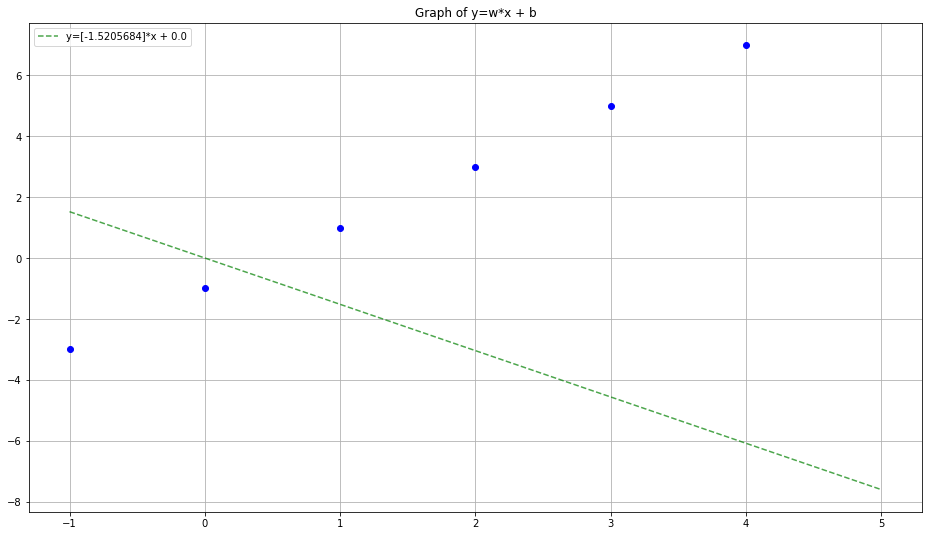

In [14]:
def plot_model_function(xs, ys, xline, w, b):
  plt.plot(xs, ys, 'bo')
  ymodel = w*xline+b
  plt.plot(xline, ymodel, '--g', label='y='+str(w)+'*x + '+str(b), alpha=0.7)
  plt.title('Graph of y=w*x + b')
  plt.legend(loc='upper left')
  plt.grid()
  #plt.show()

xline = np.linspace(-1,5,10)
ymodel = w*xline+b

plot_model_function(xs, ys, xline, w, b)

In [15]:
#Callback
class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_batch_begin(self, batch, logs=None):
    print('Training: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

  def on_train_batch_end(self, batch, logs=None):
    print('Training: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

  def on_test_batch_begin(self, batch, logs=None):
    print('Evaluating: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

  def on_test_batch_end(self, batch, logs=None):
    print('Evaluating: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

In [16]:
class get_weight_and_bias(tf.keras.callbacks.Callback):

  def on_train_batch_begin(self, batch, logs=None):
    w=model.layers[0].get_weights()[0][0][0]
    b=model.layers[0].get_weights()[1][0]
    print(w,b)

    plot_model_function(xs, ys, xline, w, b)

Epoch 1/10
-1.5205684 0.0
1/1 [==============================] - 0s 1ms/step - loss: 54.4760
Epoch 2/10
-1.1867764 0.08561705
1/1 [==============================] - 0s 1ms/step - loss: 43.2700
Epoch 3/10
-0.8900447 0.159508
1/1 [==============================] - 0s 917us/step - loss: 34.4452
Epoch 4/10
-0.626192 0.22301918
1/1 [==============================] - 0s 1ms/step - loss: 27.4940
Epoch 5/10
-0.39150938 0.27734455
1/1 [==============================] - 0s 1ms/step - loss: 22.0171
Epoch 6/10
-0.18270709 0.32354295
1/1 [==============================] - 0s 1ms/step - loss: 17.7001
Epoch 7/10
0.0031330204 0.3625533
1/1 [==============================] - 0s 1ms/step - loss: 14.2960
Epoch 8/10
0.16859934 0.39520824
1/1 [==============================] - 0s 1ms/step - loss: 11.6102
Epoch 9/10
0.31598783 0.4222461
1/1 [==============================] - 0s 1ms/step - loss: 9.4897
Epoch 10/10
0.44733503 0.44432154
1/1 [==============================] - 0s 1ms/step - loss: 7.8141


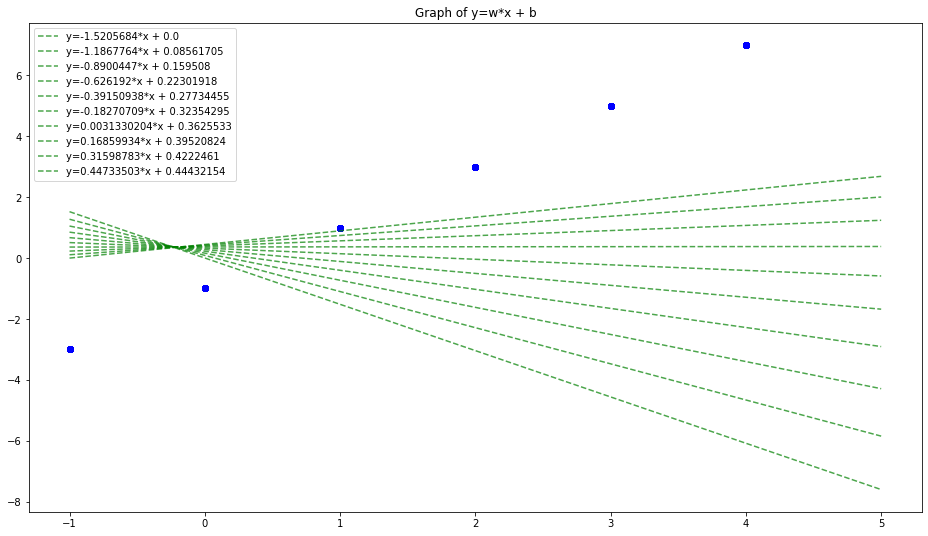

In [17]:
model.fit(xs, ys, epochs=10, callbacks=[get_weight_and_bias()])

In [18]:
print(model.predict([10.0]))

[[6.1064897]]
